In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn import metrics
from sklearn.tree import export_graphviz
import graphviz as gp

Throughout this tutorial, we are considering the *Retention modeling at Scholastic Travel Company* case.

# Part 1: Pre-processing the data

The goal of this Break Out is to brainstorm some ideas for data preprocessing/feature engineering.

In [4]:
stca_raw = pd.read_csv("stca_raw_data.csv")
stca_raw.head()

,ID,Program.Code,From.Grade,To.Grade,Group.State,Is.Non.Annual.,Days,Travel.Type,Departure.Date,Return.Date,...,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,SchoolSizeIndicator,Retained.in.2012.
0,1,HS,4.0,4.0,CA,0,1,A,40557,40557,...,K,Elementary,K->Elementary,H,1,0.063646,0.936508,4,L,1
1,2,HC,8.0,8.0,AZ,0,7,A,40557,40564,...,Middle,Middle,Middle->Middle,H,1,0.025882,0.880000,3,L,1
2,3,HD,8.0,8.0,FL,0,3,A,40558,40560,...,Middle,Middle,Middle->Middle,H,1,0.025131,0.888889,3,L,1
3,4,HN,9.0,12.0,VA,1,3,B,40558,40560,...,Undefined,Undefined,Undefined->Undefined,H,0,NaN,1.000000,0,NaN,0
4,5,HD,6.0,8.0,FL,0,6,T,40559,40564,...,Middle,Middle,Middle->Middle,H,0,0.112500,0.910112,8,M-L,0


Use this space to investigate the data if need be.

# Part 2: Predicting returning customers using logistic regression

We use here a preprocessed and engineered dataset. Of course you are more than welcome to use your own cleaned dataset if you would like to. The goal now is to proceed with classification and get some practice using the methods seen in class.

In [5]:
stca = pd.read_csv("stca_clean.csv")
stca.head()

,From.Grade,To.Grade,Is.Non.Annual.,Days,Departure.Date,Deposit.Date,Tuition,FRP.Active,FRP.Cancelled,Cancelled.Pax,...,Region_New_Mountain,Region_New_North East,Region_New_Northen California,Region_New_Pacific,Region_New_South Atlantic,Region_New_South Central,Region_New_Southern California,Region_New_Texas,Region_New_West North Central,DepartureSeason_Winter
0,4.0,4.0,0.0,1.0,40557.0,40420.0,424.0,25.0,3.0,3.0,...,0,0,0,0,0,0,1,0,0,1
1,8.0,8.0,0.0,7.0,40557.0,40132.0,2350.0,9.0,9.0,11.0,...,1,0,0,0,0,0,0,0,0,1
2,8.0,8.0,0.0,3.0,40558.0,40466.0,1181.0,17.0,6.0,6.0,...,0,0,0,0,1,0,0,0,0,1
3,6.0,8.0,0.0,6.0,40559.0,40451.0,865.0,40.0,8.0,9.0,...,0,0,0,0,1,0,0,0,0,1
4,10.0,12.0,0.0,4.0,40560.0,40451.0,2025.0,9.0,4.0,3.0,...,0,0,0,0,0,1,0,0,0,1


Create the labels `y` and the feature matrix `X` as discussed in class. Recall that we are trying to predict the outcome `"Retained.in.2012."`

In [6]:
y=stca[["Retained.in.2012."]]

In [7]:
X=stca.drop(columns=["Retained.in.2012."])

Separate the data into training/validation/testing with percentages 60/20/20, using `train_test_split`. Why are we creating a validation set here?

In [8]:
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.4, random_state = 657)

In [9]:
X_test, X_validation, y_test, y_validation = train_test_split(X_other, y_other, test_size=0.5, random_state = 343)

Using `scikit` run a logistic regression on `X_train,y_train` with the parameter `max_iter` set to 2000 (that is, use `LogisticRegression(max_iter=2000)`. What are the 5 largest coefficients and the 5 smallest? Do they make sense intuitively?

In [10]:
classifier_LR = LogisticRegression(max_iter=2000)
classifier_LR.fit(X_train, y_train.values.ravel())

LogisticRegression(max_iter=2000)

The code below prints out the five largest coefficients:

In [11]:
summary = pd.DataFrame([X_train.columns,classifier_LR.coef_[0]]).T.sort_values(by = 1, ascending = False)
summary.columns = ['Variable','Coefficient']
summary.head(n=5)

,Variable,Coefficient
19,SingleGradeTripFlag,0.458681
20,Ability_to_Pay,0.309634
0,From.Grade,0.292735
13,MDR.Low.Grade,0.082621
38,Region_New_Southern California,0.080665


The next piece of code prints out the five smallest coefficients

In [12]:
summary.tail(n=5)

,Variable,Coefficient
29,SchoolSizeIndicator_S,-0.148782
14,MDR.High.Grade,-0.281402
27,SPR.New.Existing_NEW,-0.306903
2,Is.Non.Annual.,-0.392015
1,To.Grade,-0.481541


Obtain the predicted probabilities for `X_validation`, using `[model-name].predict_proba(X_validation)[:,1]`. What are different ways of measuring how good the method is? We'll take a look at the ROC curve (using `metrics.roc_curve`), then use the area under the curve here given by `metrics.roc_auc_score` to evaluate the quality of our model.

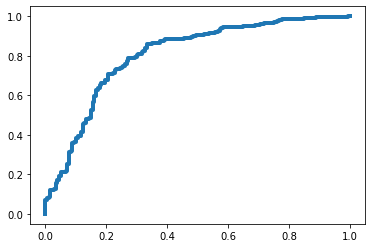

In [13]:
from matplotlib import pyplot
y_pred_prob = classifier_LR.predict_proba(X_validation)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_validation,y_pred_prob)
pyplot.plot(fpr, tpr, linewidth=4)
plt.show()

In [14]:
metrics.roc_auc_score(y_validation, y_pred_prob)

0.8040710751237068

Recall that the area under the curve is generated with different values of the threshold. Our goal is now to think about a threshold. What is a false positive here / a false negative? Which one do you think we should focus on assuming that we adapt our marketing policy based on the output of our algorithm?

False positives here are the number of clients we predict we retain and then don't. False negatives are the number of clients we predict we don't retain and then do. Let's take a look at both cases: if we predict that a customer will not be retained (while he is - FN), then we will invest some amount of money trying to make him happy when he was in fact already happy. If we predict that a customer will be retained (while he will not be FP), then we don't spend money on trying to retain him --- but we lose a customer and have to go through the long and expensive process of replacing that customer. Overall, better to invest many small sums than lose clients: better to have small FP and large FN.

Set the threshold to 0.7 using `np.where`. Then, obtain the `metrics.confusion_matrix`, as well as the `metrics.accuracy_score`.

In [15]:
threshold = 0.7
y_validation_pred = np.where(y_pred_prob < threshold, 0, 1)

In [16]:
metrics.confusion_matrix(y_validation, y_validation_pred)

array([[145,  35],
       [ 82, 165]], dtype=int64)

In [17]:
metrics.accuracy_score(y_validation,y_validation_pred)

0.7259953161592506

# Part 3: Setting a threshold

A good starting point for setting a threshold is the population average (0.613 in our case). There are other thresholds to set, that try to balance the true positive and false positive rates in an effective way. One example is [Youden’s J statistic](https://en.wikipedia.org/wiki/Youden%27s_J_statistic). This is simply calculated as:

$J = Sensitivity + Specificity – 1  = True Positive Rate – False Positive Rate$

We have this available directly from creating the ROC curve:

In [18]:
J = tpr - fpr
J

array([0.        , 0.00404858, 0.06882591, 0.06327036, 0.0754161 ,
       0.06986055, 0.07390913, 0.06835358, 0.10479082, 0.09367971,
       0.0977283 , 0.09217274, 0.1245614 , 0.11900585, 0.13520018,
       0.12964462, 0.14583896, 0.1402834 , 0.16052632, 0.1494152 ,
       0.15346379, 0.14790823, 0.15195682, 0.14640126, 0.17878992,
       0.17323437, 0.23396311, 0.22840756, 0.23650472, 0.23094917,
       0.26738641, 0.26183086, 0.26992803, 0.26437247, 0.28461538,
       0.27905983, 0.287157  , 0.27604588, 0.2962888 , 0.29073324,
       0.33121907, 0.32566352, 0.33376068, 0.32820513, 0.34439946,
       0.33328835, 0.34138552, 0.33582996, 0.37631579, 0.37076023,
       0.41124606, 0.40569051, 0.43403059, 0.42847503, 0.4608637 ,
       0.45530814, 0.46340531, 0.45784975, 0.47404408, 0.46848853,
       0.4765857 , 0.46547458, 0.48166892, 0.4705578 , 0.50294647,
       0.4862798 , 0.49032839, 0.48477283, 0.50096716, 0.49541161,
       0.49946019, 0.48834908, 0.49239766, 0.48684211, 0.49089

The approach involves maximizing $J$. Hence, we simply pick the threshold with the highest $J$:

In [19]:
print("The best threshold according to the J statistic is " + str(thresholds[np.argmax(J)]))

The best threshold according to the J statistic is 0.5679412669029718


Let's see the confusion matrix at this threshold:

In [20]:
threshold = thresholds[np.argmax(J)]
y_validation_pred = np.where(y_pred_prob < threshold, 0, 1)
metrics.confusion_matrix(y_validation, y_validation_pred)

array([[120,  60],
       [ 35, 212]], dtype=int64)

There are many other similar metrics, of course. But of course, these are not dependent on the specifc costs of false positives and false negatives (recall that in some applications, FP are more expensive, and in others, FN are more expensive).

If we know the cost of any of the outcomes, we can directly compute the cost of our prediction mistakes. To go back to the example above, let's make a few assumptions:

- STC only markets to groups it thinks will not be retained, at a cost of £100 per group
- A non-retained group that receives marketing will be convinced otherwise
- Any group going on a trip (whether retained, or because it receives marketing), brings in a benefit of £1,000

What does this mean for STC's profits?

1. True negative: we market to this group, and it would in fact not have been retained otherwise. The net-profit then is £900
2. False negative: we market to this group, even though it would have been retained. The net-profit for such a group is £900
3. False positive: we assume the group is not retained, so we don't market to it (and lose it). The net-profit here is £0
4. True positive: we correcly assume that the group is retained, and we don't market to it. The net-profit here is £1000

Given this, we can now calculate the profits we would get from the validation customers, using the confusion matrix (we start again with a threshold of 0.7):

In [21]:
threshold = 0.7
y_validation_pred = np.where(y_pred_prob < threshold, 0, 1)
cm = metrics.confusion_matrix(y_validation, y_validation_pred)
profit = cm[0][0] * 900 + cm[1][0] * 900 + cm[0][1] * 0 + cm[1][1] * 1000
print("The profit at threshold " + str(threshold) + " is " + str(profit))

The profit at threshold 0.7 is 369300


Let's try for the threshold given by the J-statistic:

In [22]:
threshold = thresholds[np.argmax(J)]
y_validation_pred = np.where(y_pred_prob < threshold, 0, 1)
cm = metrics.confusion_matrix(y_validation, y_validation_pred)
profit = cm[0][0] * 900 + cm[1][0] * 900 + cm[0][1] * 0 + cm[1][1] * 1000
print("The profit at threshold " + str(threshold) + " is " + str(profit))

The profit at threshold 0.5679412669029718 is 351500


We can see how to optimize this, right?

# Part 4: CART for classification

We now move onto using CART for classification. We will also be using the Area Under the Curve (AUC) to measure how good our model is.

We start by fitting a Classification Tree to the data with `max_leaf_nodes=8`:

In [23]:
classifier_DT = DecisionTreeClassifier(max_leaf_nodes = 8)
classifier_DT.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=8)

We can use the code below to plot the tree. Which variables seem to intervene? Are they similar to the ones obtained for Logistic Regression?

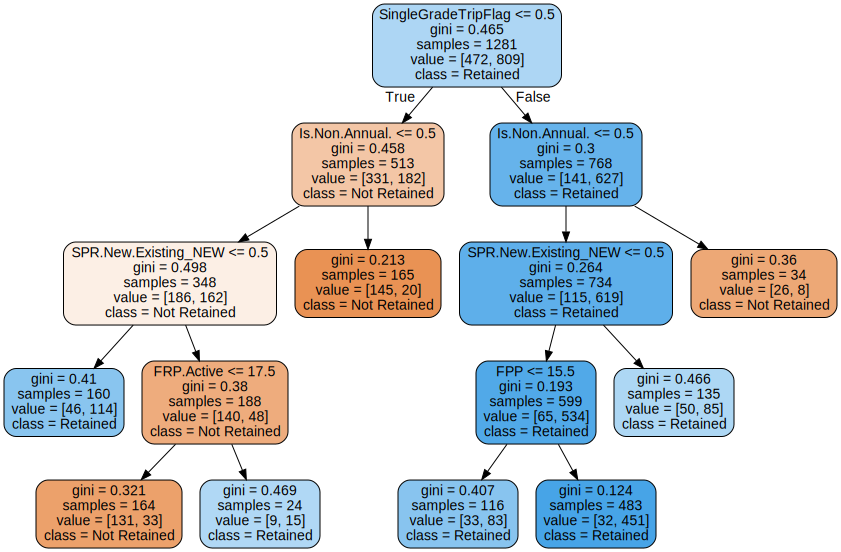

In [24]:
from sklearn.tree import export_graphviz
dot_data = export_graphviz(classifier_DT, feature_names = X_train.columns, filled = True, rounded = True, class_names=["Not Retained","Retained"])
graph = gp.Source(dot_data)
graph

Then we use it to obtain the predicted probabilities of retention (i.e., classifier = 1) on `X_validation` using `.predict_proba`.

In [25]:
y_pred_prob = classifier_DT.predict_proba(X_validation)[:,1] # probabilities

How good is the model? Compute the AUC for this model and the accuracy using the same threshold as above.

In [26]:
metrics.roc_auc_score(y_validation, y_pred_prob)

0.8584795321637426

In [27]:
y_validation_pred = np.where(y_pred_prob > threshold, 1, 0)

In [28]:
metrics.accuracy_score(y_validation,y_validation_pred)

0.7915690866510539

In [29]:
metrics.confusion_matrix(y_validation, y_validation_pred)

array([[107,  73],
       [ 16, 231]], dtype=int64)

# Part 5: Wrapping up

If you were advising this company, what model would you recommend they use? Retrain the model you have selected on the training+validation set, then test it on the test set and report the AUC and profit on the test set. (These could be useful for the company to have.) Comment on the robustness of the approach.

In [30]:
X_end=X_train.append(X_validation)
y_end=y_train.append(y_validation)

In [31]:
classifier_DT = DecisionTreeClassifier(max_leaf_nodes = 8)
classifier_DT.fit(X_end, y_end)
y_pred_prob = classifier_DT.predict_proba(X_test)[:,1]  

threshold = 0.7
y_test_pred = np.where(y_pred_prob > threshold, 1, 0)

print("AUC: " + str(metrics.roc_auc_score(y_test,y_pred_prob)))

cm = metrics.confusion_matrix(y_test, y_test_pred)
profit = cm[0][0] * 900 + cm[1][0] * 900 + cm[0][1] * 0 + cm[1][1] * 1000

print("Profit: " + str(profit))

AUC: 0.8328684807256237
Profit: 368400


This is a pretty consistent performance.

Would there be any other recommendations except for the model and the consequent predictions that you would give to the company based on your analyses?

- It seems that in every method, "SingleGradeTripFlag" intervenes signaling that when the trip contains just a single grade, the client is more likely to come back. We may need to investigate why that is---do trips with multiple grades go badly?
- We should maybe do two different analyses based on the "Is.Non.Annual" flag: one that is bi-yearly (where we include all datapoints with "Is.Non.Annual"=1) and one that is yearly (where we include all datapoints with "Is.Non.Annual"=0). 
- It seems to be really important to capture the first-time clients: once clients have returned once, they seem to keep returning.
- The earlier the clients commit and the more full-paying participants they have seems to impact the likelihood of being retained: it seems that STC's best performances intervene in the case where there are a high number of participants.